# COMS21202: Symbols, Patterns and Signals #
# Lab 3: Least Square Method #

---
Tip: You will need to refer to the help pages to complete most of these examples.
Tip: There is slight difference between `np.array` and `np.matrix` especially when it comes to operations on those. If you're not shure what type is given object try `print( type(x) )`.

To start with, run the code cell below to import  needed libraries.

In [2]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1.  Get some numbers ##
**a) **Generate a sequence of 10 numbers ${y_i}$, $1\leq i\leq 10$, using the following equation
$$
y_i=0.2+0.5x_i+e_i
$$
where $x_i$ is a *uniformly distributed* random number between 0 and 1 and $e_i$ is a *random* number from $N(0,0.1)$ indicating a normally-distributed error in the measurement.

In [9]:
# put your code here


##CORRECT ANSWER##
i = 10
x = np.random.rand(i, 1)
e = np.sqrt(0.1) * np.random.randn(i, 1) + 0

y = 0.2 + 0.5*x + e
print (y)

##CORRECT ANSWER##

[[ 0.68749112]
 [ 0.4771551 ]
 [ 0.83746548]
 [ 0.53348825]
 [-0.18278883]
 [ 0.22268885]
 [ 0.31488839]
 [ 0.05727793]
 [ 0.66995892]
 [ 0.50617501]]


**b) **Generate a scatter plot of $x_i, y_i$.

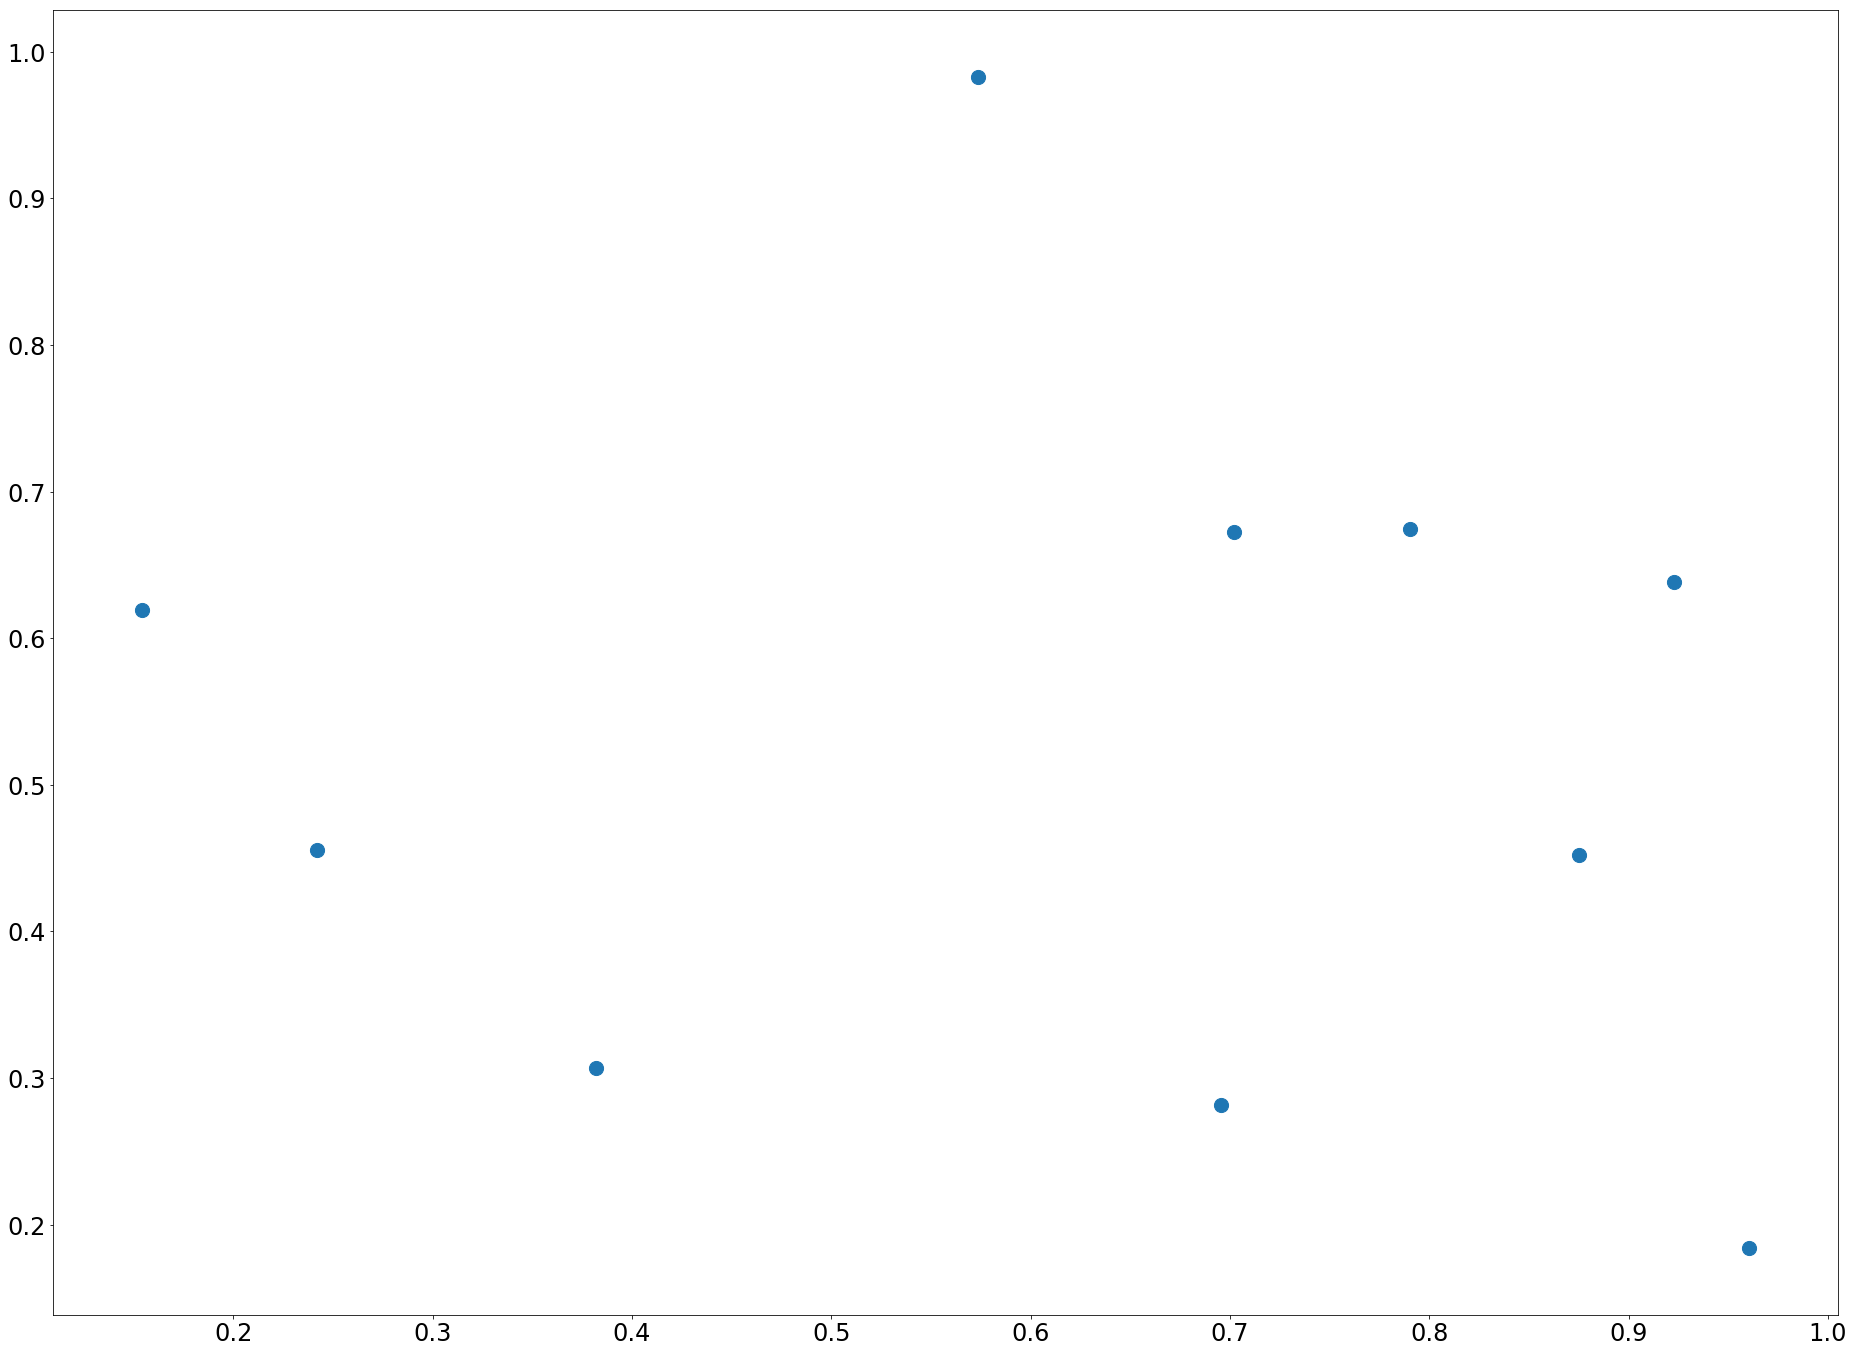

In [4]:
# put your code here


##CORRECT ANSWER##
fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.scatter( x, y, s=200 )
plt.show()
##CORRECT ANSWER##

## 2. Create a general function ##
Change the above code to a function that receives the parameters $m$, $c$ and $n$ for the equation $y_i = c + m x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  
Use the code to generate a 100 samples from the equation above and scatter plot the new sample.

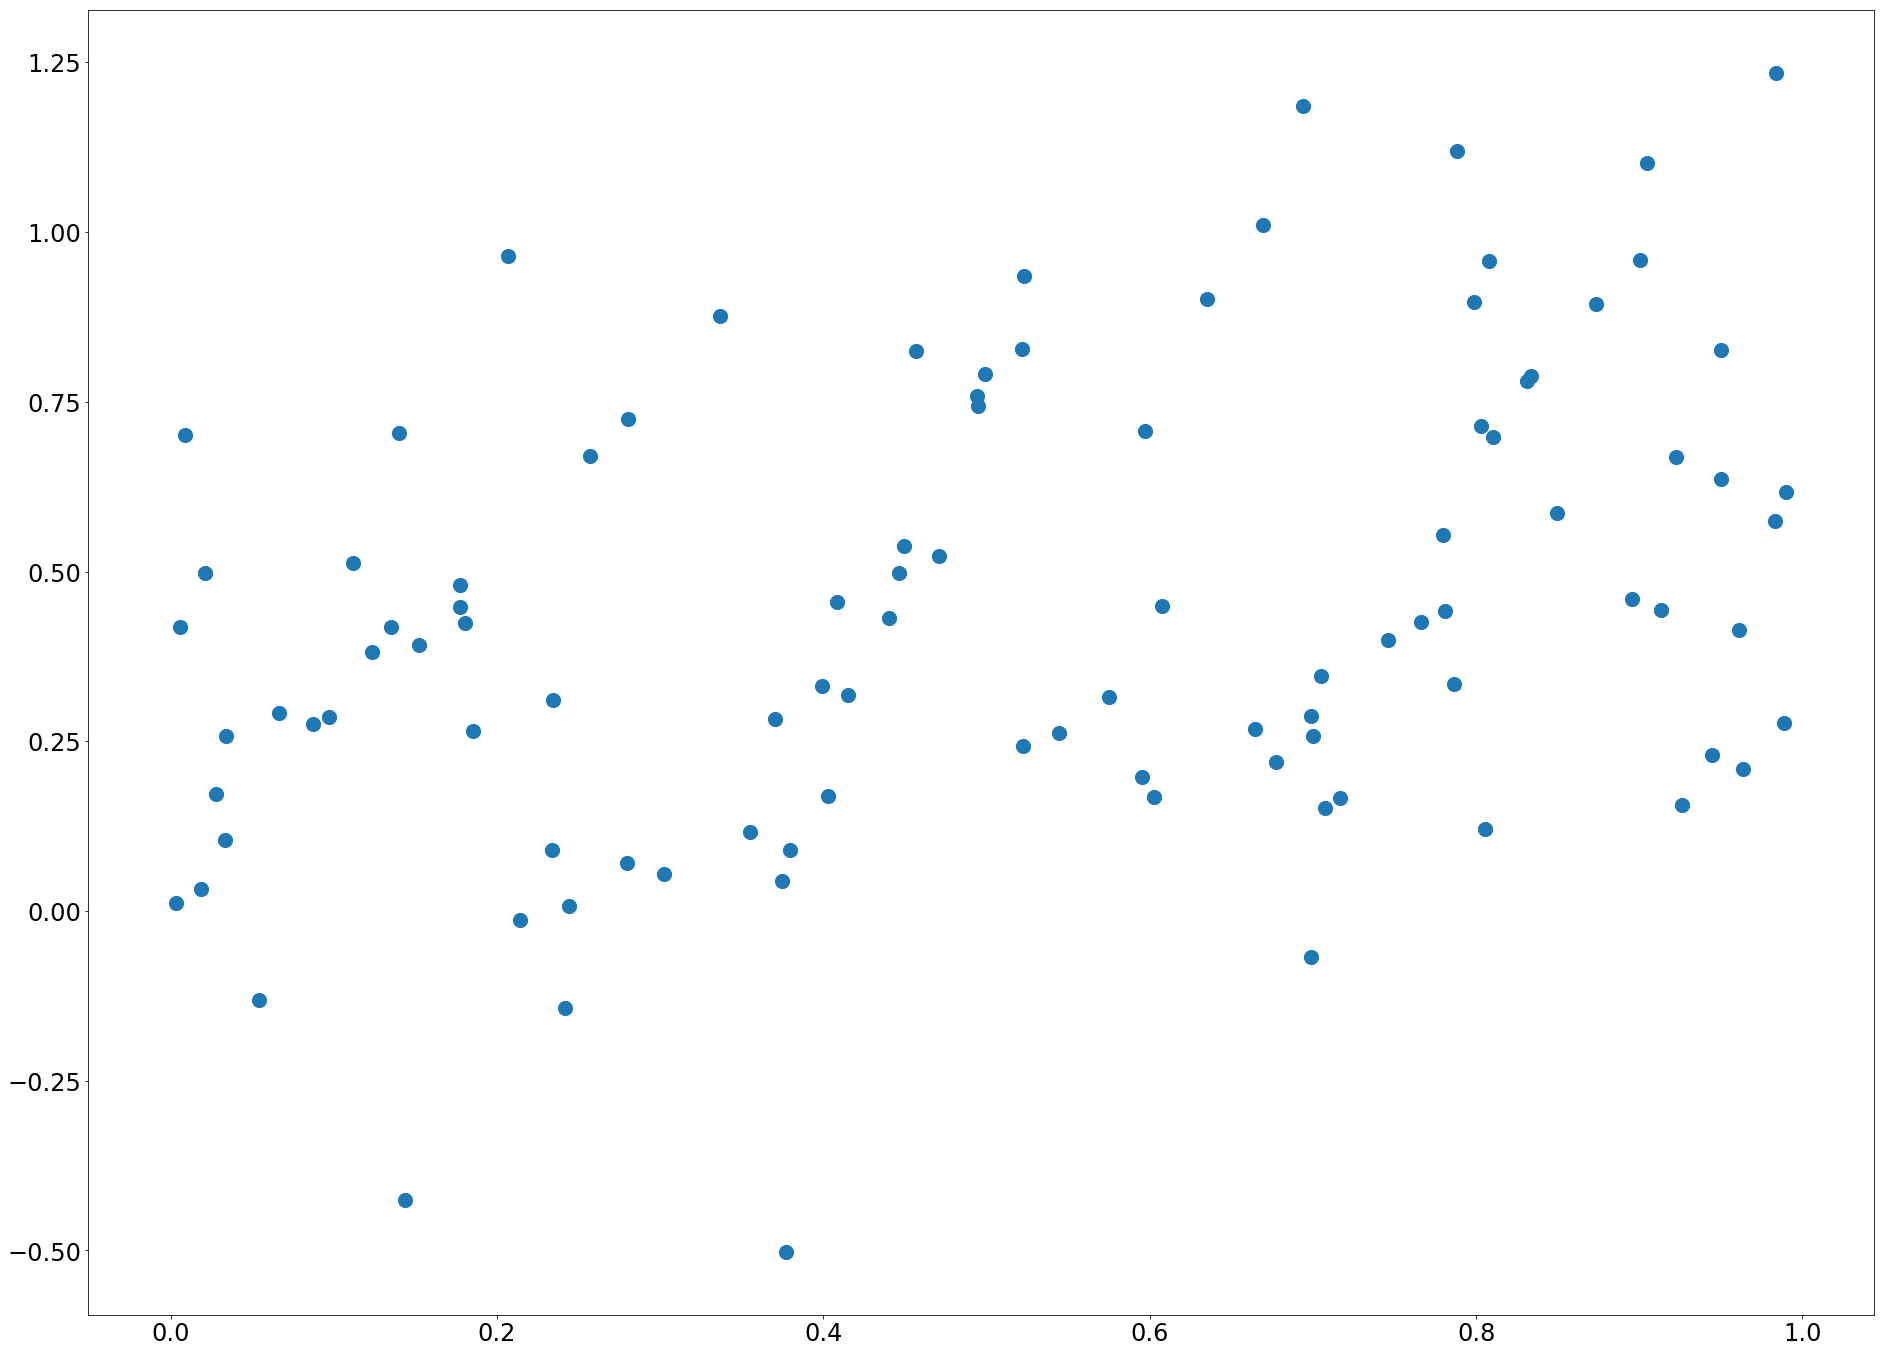

In [5]:
# put your code here


##CORRECT ANSWER##
def myEq(m, c, n):
    x = np.random.rand(n, 1)
    e = np.sqrt(0.1) * np.random.randn(n, 1) + 0
    y = c + m*x + e
    return x, y

x_1, y_1 = myEq(0.5, 0.2, 100)

fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.scatter( x_1, y_1, s=200 )
plt.show()
##CORRECT ANSWER##

## 3. Least squares - Matrix Form ##
Using the sequences ${y_i}$ and ${x_i}$ from **Q2**, implement the matrix form of the method of least squares to determine estimates of the parameters $a$ and $b$ assuming that $y_i=a+bx_i+e_i$.

In [6]:
# put your code here

##CORRECT ANSWER##
def myLS(x, y):
    # extend the first column with 1s
    ones = np.matrix( [1.0]*x.shape[0] ).T
    x_e = np.concatenate((ones, x),1)
    v = np.linalg.inv(x_e.T * x_e) * x_e.T * y
    return v

v = myLS(x_1, y_1)
a_1 = v[0,0];
b_1 = v[1,0];
print ("a: ", a_1, " b: ", b_1)
##CORRECT ANSWER##

a:  0.230489907114  b:  0.409330328332


### Discuss: ### 
<font color="blue">what is the effect of changing the mean and the standard deviation of ei on the
estimated values of m and c
</font>

## 4. Line fitting ##

Draw the line defined by the estimated values of $a$ and $b$ on top of the scatter plot generated in **Q2**. Note: do not use any pre-defined functions. Write your own code to plot the line.

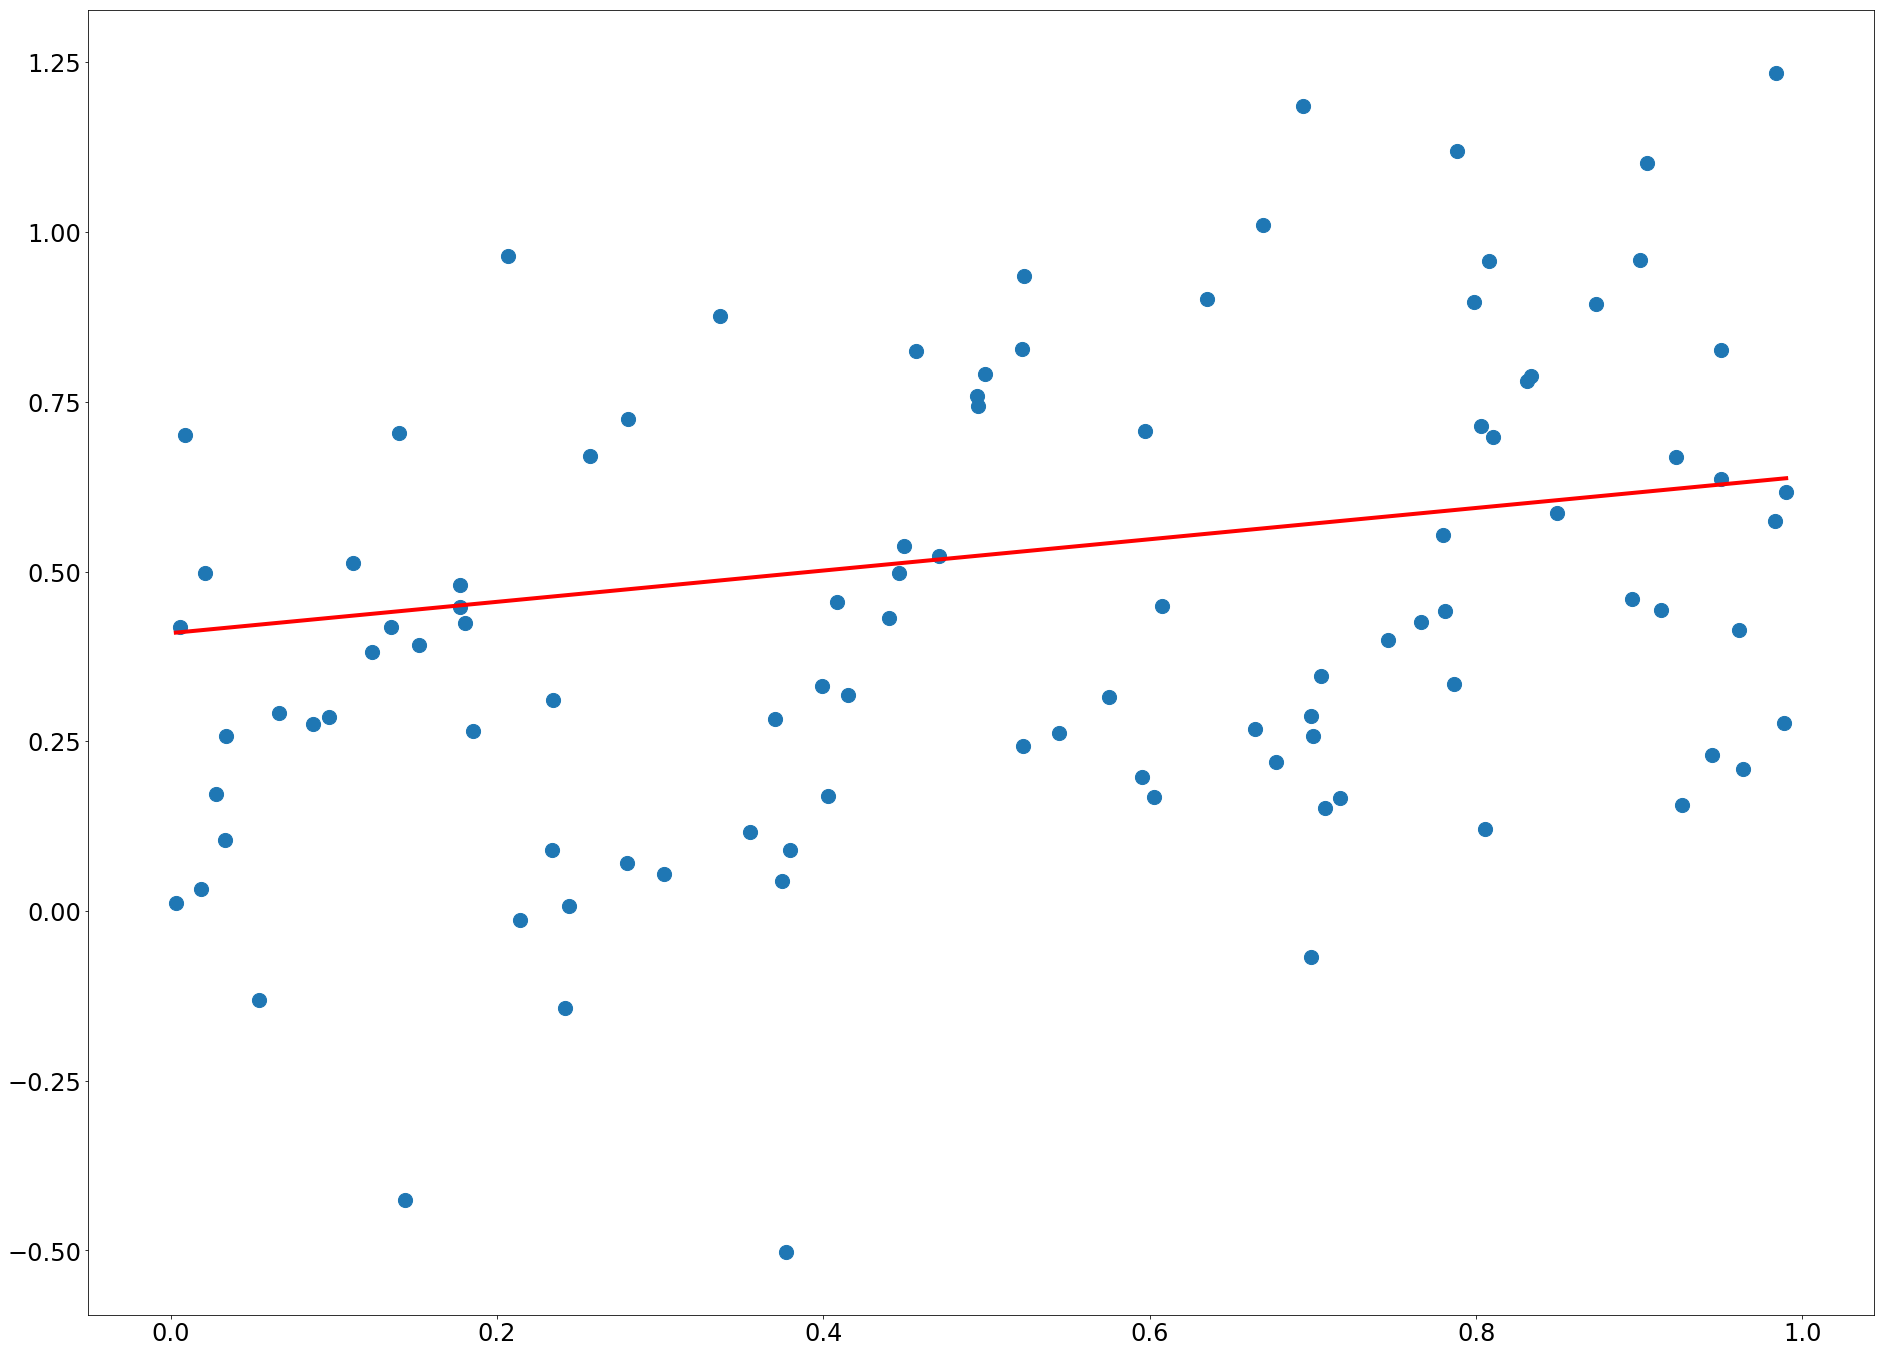

In [7]:
# put your code here

##CORRECT ANSWER##
x_1_1r = x_1.min()
x_1_2r = x_1.max()
y_1_1r = a_1 * x_1_1r + b_1
y_1_2r = a_1 * x_1_2r + b_1

fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.scatter( x_1, y_1, s=200 )
ax.plot([x_1_1r, x_1_2r], [y_1_1r, y_1_2r], 'r-', lw=4)
plt.show()
##CORRECT ANSWER##

## 5. Outliers ##
Add a few outliers to your data. For example, add the points {(0.5, 5), (0.6, 5), (0.7, 5)} to the sampled sequences from Q2.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).

![Line fit](lineFit.jpg)

ValueError: Masked arrays must be 1-D

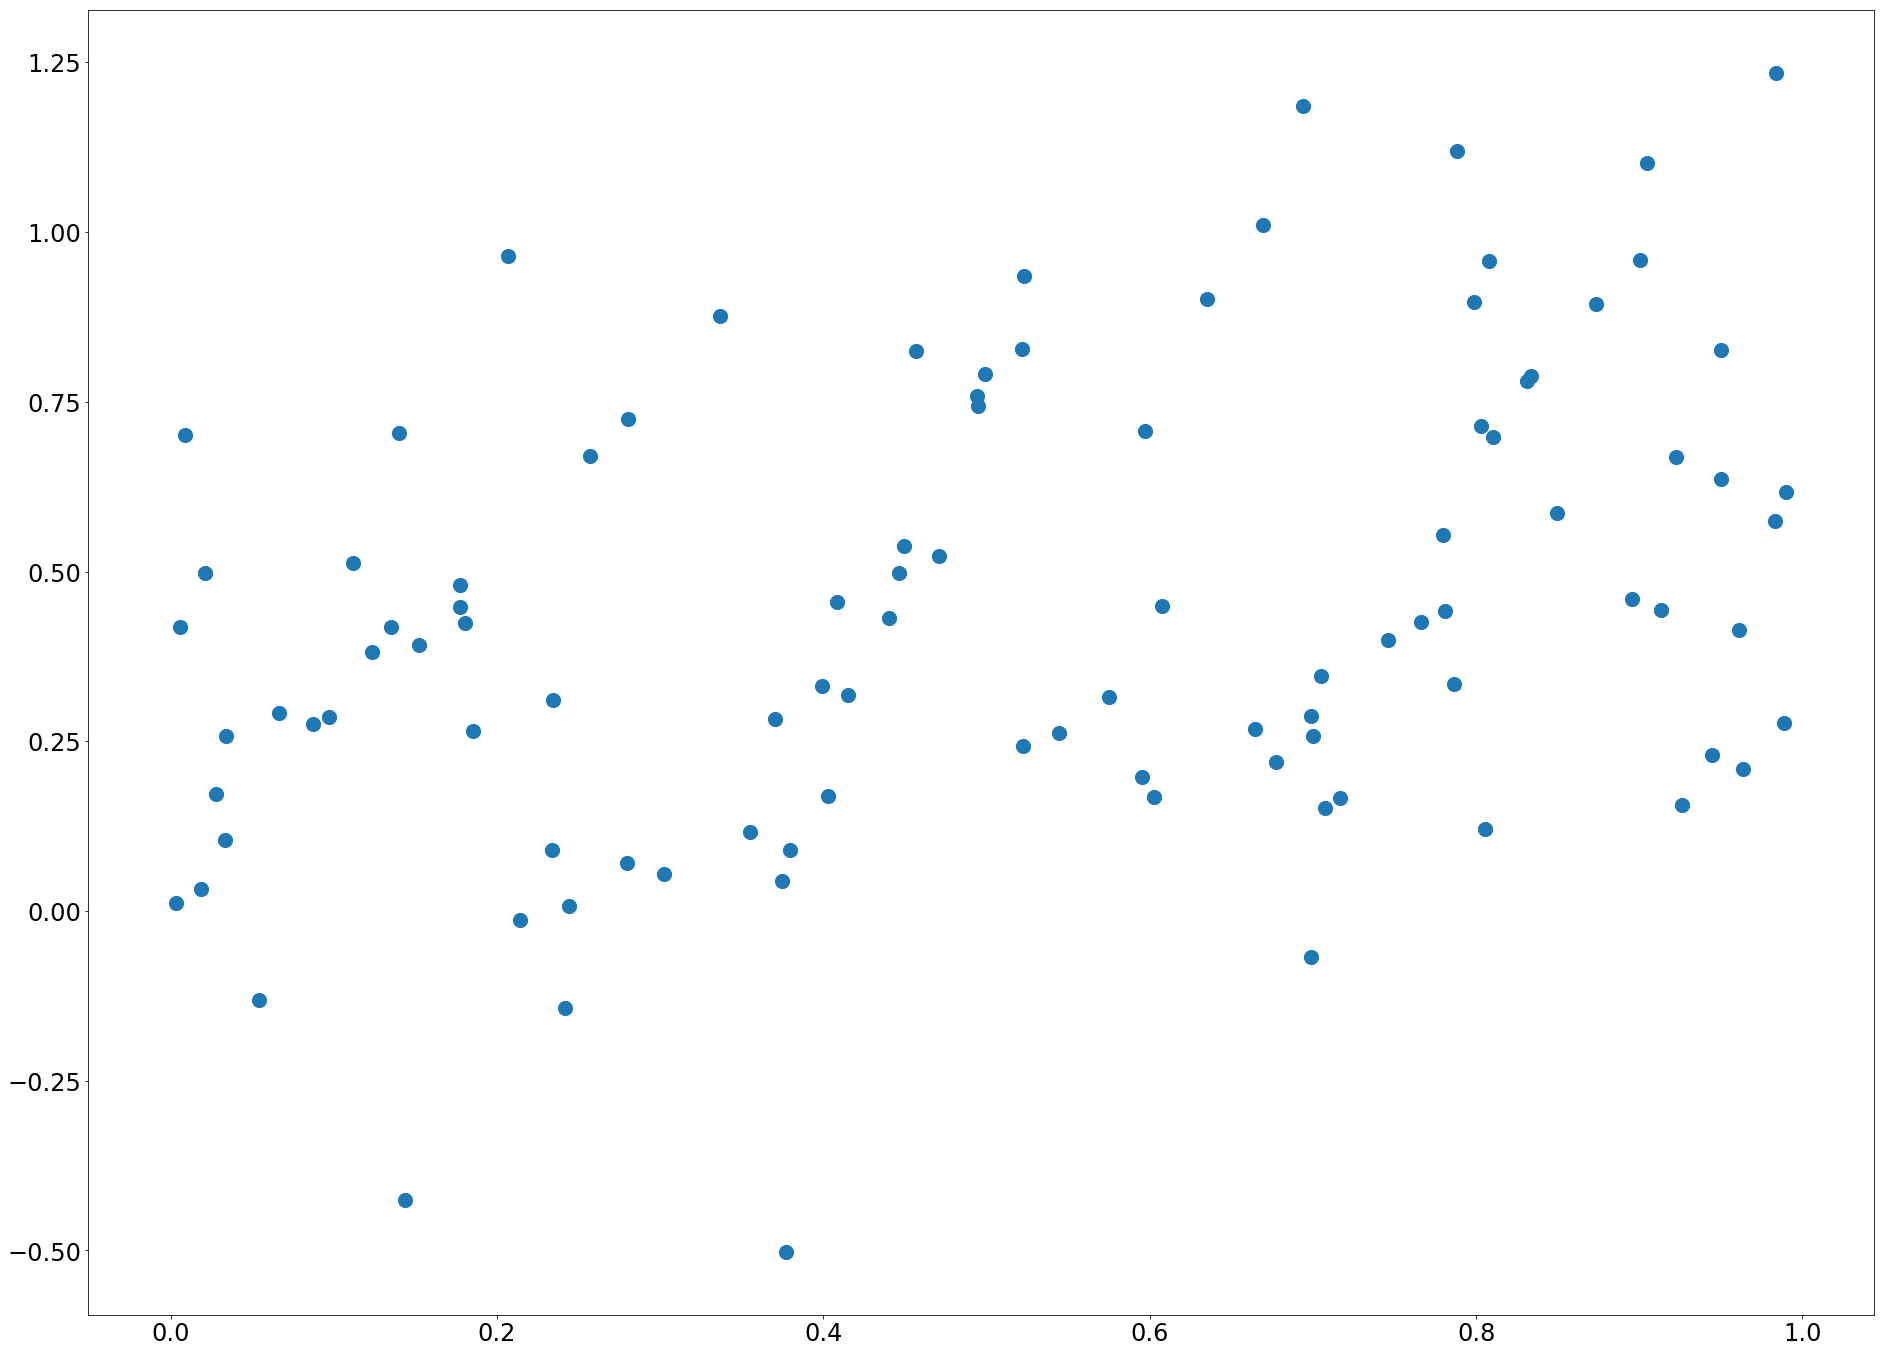

In [10]:
# put your code here

##CORRECT ANSWER##
o_x = np.matrix([[0.5], [0.6], [0.7]])
o_y = np.matrix([[5.0], [5.0], [5.0]])
x_1_o = np.append( x_1, np.matrix([[0.5], [0.6], [0.7]]), axis=0 )
y_1_o = np.append( y_1, np.matrix([[5.0], [5.0], [5.0]]), axis=0 )

v = myLS(x_1_o, y_1_o)
a1o = v[0,0]
b1o = v[1,0]
xo1 = x_1_o.min()
xo2 = x_1_o.max()
yo1 = a1o * xo1 + b1o
yo2 = a1o * xo2 + b1o

fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.scatter( x_1, y_1, s=200, label="Data" )
ax.scatter( o_x, o_y, s=400, marker='x', color='r', label="Outliers" )
ax.plot([x_1_1r, x_1_2r], [y_1_1r, y_1_2r], 'g-', lw=4, label="Best fit")
ax.plot([xo1, xo2], [yo1, yo2], 'r-', lw=4, label="Best fit with outliers")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
##CORRECT ANSWER##

### Discuss ###

<font color="blue">what is the effect of outliers on the best line estimate?</font>

## 6. Choosing your Model ##

### 6.1. Loading your data ###

Load the data in the file DMD.csv where the first column is $x_i$ and the second column is $y_i$.

Generate a scatter plot of $(x_i, y_i)$.

In [ ]:
DMD = np.loadtxt('DMD.csv', delimiter=',');

fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.scatter( DMD[:,0], DMD[:,1] )

plt.show()

### 6.2. Deciding on the Model's Complexity ###

Assuming a polynomial relationship between $x_i$ and $y_i$, what would you suggest as a suitable complexity for the model? Write your model’s equation.

---
<font color="red">Correct answer</font>  

$y_i = a_0 + a_1 x_i + a_2 x_i^2$

---

### Discuss ###

<font color="blue">for the model you’ve chosen, what are the parameters of the model?</font>

### 6.2. Calculating the Model's Parameters ###

Adjust the code in Q3 if needed to calculate the parameters of your chosen model for this data.

### Discuss ###
<font color="blue">what would X and y in the least squares solution be?</font>

Plot your best fitting polynomail from Q8.

In [ ]:
x_1 = DMD[:,[0]];
x_1 = np.concatenate((DMD[:,[0]], DMD[:,[0]]**2),1)
y_1 = DMD[:,[1]];
v = myLS(x_1, y_1)
print ("v: ", v)

x = np.arange(10).T
y_2 = v[0] + v[1] *x + v[2] * x**2;

fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.scatter( DMD[:,0], DMD[:,1] )
ax.plot(x, y_2.T)

### 6.3. Generalisation and Overfitting ###

What would the model be if you generalise it further?

What would the model be if you attempt to overfit the training data?

### Discuss ###

<font color="blue">write down your answers for 6.3 and discuss your written explanation
with a lecturer or a TA</font>

---
<font color="red">Correct answer</font>  

A polynomial of degree one would be a worse fit for the data clearly with a significant increase in the residual.

A polynomial of a higher degree (4 for example) would be used if attempting to overfit. While this will decrease
the residual is unlikely to be a good fit for future data due to overfitting.

---